In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from run_evolution import folder_evol
from analytical_results import fT00, fT01, fT11, fj0, fj1, fnu, fLn
from ploting import plot_heatmaps

save = False

In [3]:
g = 1
v, Q = 1, 1
tol, method = 1e-6, '12site'
#
ms = [0, 0.5]
mg = [g * x for x in ms]
NaDdt = [(256, 0.125, 128, 1/16)]
data = {}

for m in ms:
    for N, a, D, dt in NaDdt:
        D0 = D
        # try:
        folder = folder_evol(g, m, a, N, v, Q, D0, dt, D, tol, method, mkdir=False)
        data[m, N, a, D, dt] = np.load(folder / f"results.npy", allow_pickle=True).item()
        # except FileNotFoundError:
        #     pass

In [4]:
NUM_COLORS = 14
cm = plt.get_cmap('nipy_spectral') #hsv') #'gist_rainbow')
colors = [cm(i / (NUM_COLORS-0.5)) for i in range(NUM_COLORS)]
lines = ['-', '--', ':']

In [6]:
for ii, x in enumerate(colors):
    print(r"\definecolor{" + f"c{ii:02d}" + r"}{rgb}{"+ f"{x[0]/1:0.2f}, {x[1]/1:0.2f}, {x[2]/1:0.2f}" + r"}")

\definecolor{c00}{rgb}{0.00, 0.00, 0.00}
\definecolor{c01}{rgb}{0.49, 0.00, 0.56}
\definecolor{c02}{rgb}{0.05, 0.00, 0.66}
\definecolor{c03}{rgb}{0.00, 0.18, 0.87}
\definecolor{c04}{rgb}{0.00, 0.58, 0.87}
\definecolor{c05}{rgb}{0.00, 0.67, 0.62}
\definecolor{c06}{rgb}{0.00, 0.61, 0.07}
\definecolor{c07}{rgb}{0.00, 0.78, 0.00}
\definecolor{c08}{rgb}{0.00, 0.98, 0.00}
\definecolor{c09}{rgb}{0.80, 0.98, 0.00}
\definecolor{c10}{rgb}{0.99, 0.82, 0.00}
\definecolor{c11}{rgb}{1.00, 0.41, 0.00}
\definecolor{c12}{rgb}{0.89, 0.00, 0.00}
\definecolor{c13}{rgb}{0.80, 0.24, 0.24}


In [7]:
def get_tsm(signals, ev):
    tm = signals["time"]
    mask = tm > -1
    tm = tm[mask]
    ee = signals[ev][mask]
    ee = ee - ee[0, :]
    ee = (ee[:, 0::2] + ee[:, 1::2]) / 2  # average over 2*n and 2*n+1
    mid = (ee[:, N // 4] + ee[:, N // 4 - 1])/2
    return tm, ee, mid


In [8]:
Nadt = [(256, 0.125, 1/16)]

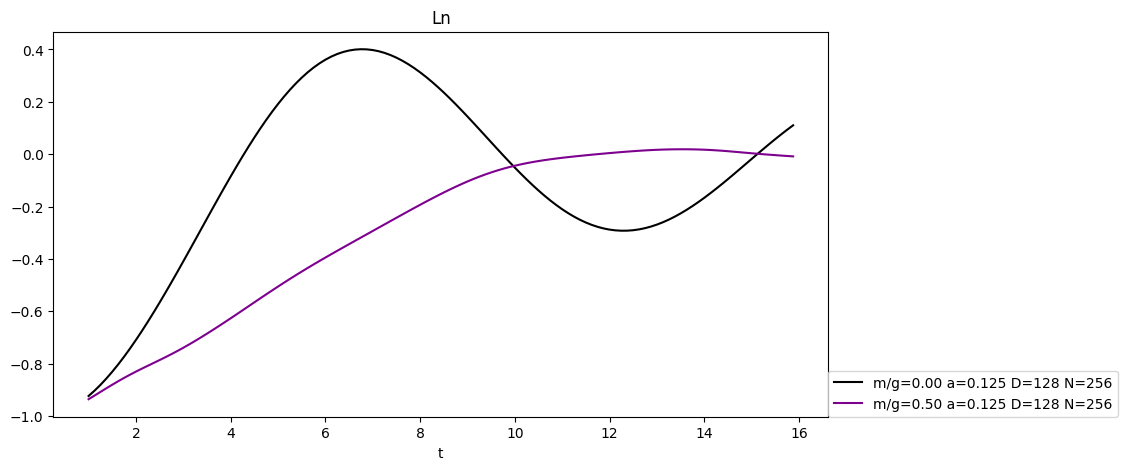

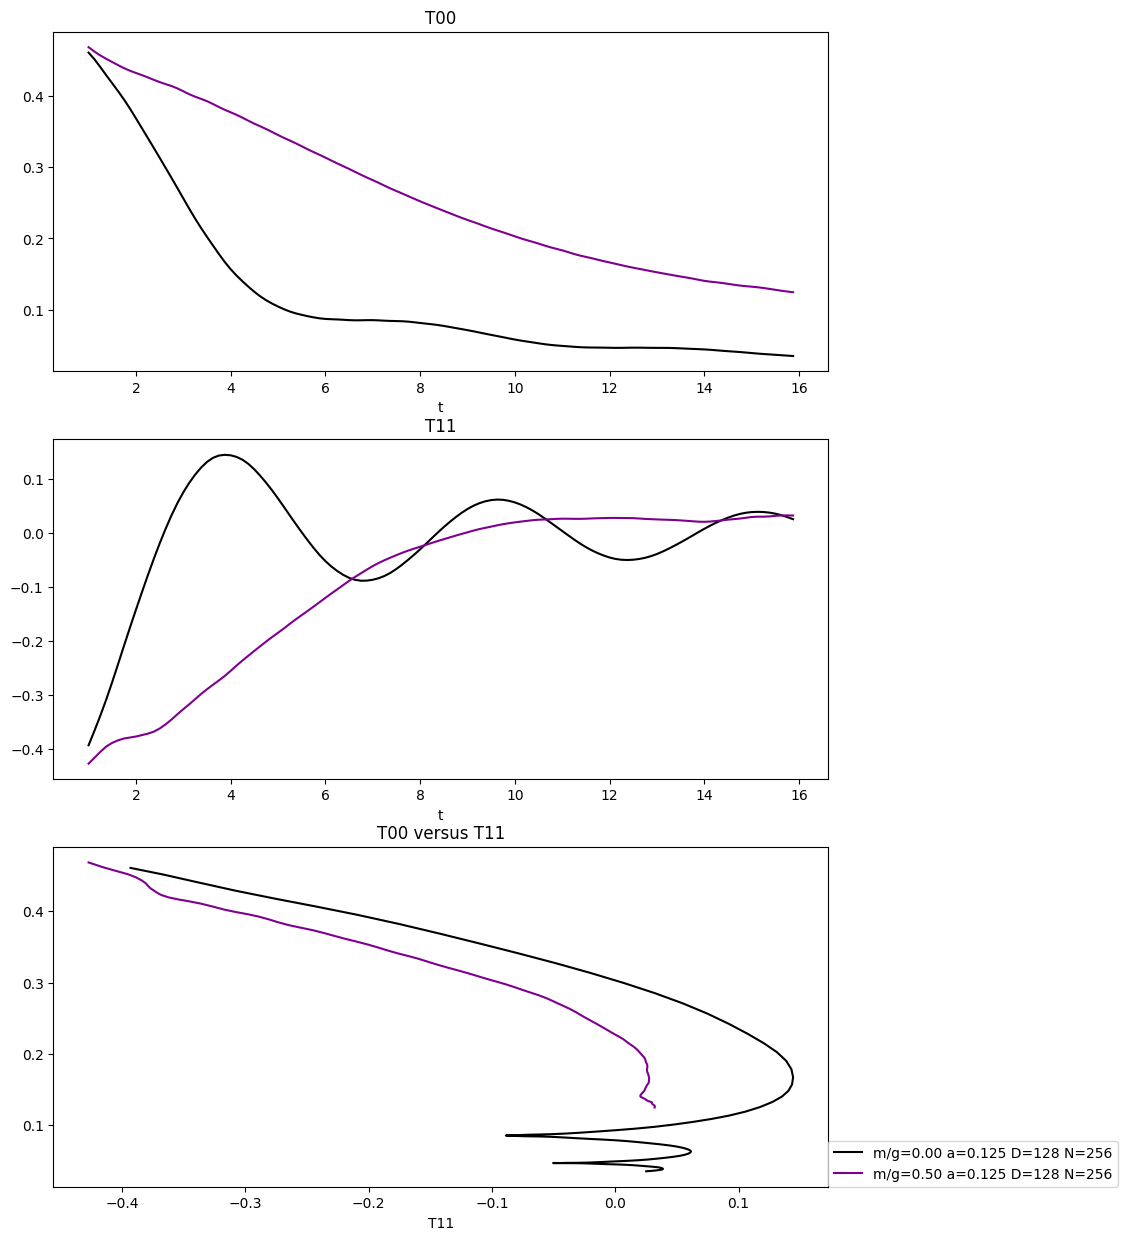

In [9]:
plt.figure(figsize=(10, 5))
D=128
for j, (N, a, dt) in enumerate(Nadt):
    for i, m in enumerate(ms):
        try:
            tm, ee, mid = get_tsm(data[m, N, a, D, dt], 'Ln')
            line, = plt.plot(tm[8:-1], mid[8:-1], lines[j], color=colors[i])
            line.set_label(f'{m/g=:.2f} {a=} {D=} {N=}')
            # np.savetxt(f'Ln_{m=:.2f}.txt', np.column_stack([tm[8:-1], mid[8:-1]]))
        except KeyError:
            pass

plt.legend(loc=(1,0))
plt.xlabel('t')
plt.title('Ln')

fig, ax = plt.subplots(3, 1, figsize=(10, 15))

for j, (N, a, dt) in enumerate(Nadt):
    for i, m in enumerate(ms):
        try:
            tm, ee, midE = get_tsm(data[m, N, a, D, dt], 'T00')
            tm, ee, midp = get_tsm(data[m, N, a, D, dt], 'T11')
            ax[0].plot(tm[8:-1], midE[8:-1], lines[j], color=colors[i], label=f'{m/g=:.2f} {a=} {D=} {N=}')
            ax[1].plot(tm[8:-1], midp[8:-1], lines[j], color=colors[i], label=f'{m/g=:.2f} {a=} {D=} {N=}')
            ax[2].plot(midp[8:-1], midE[8:-1], lines[j], color=colors[i], label=f'{m/g=:.2f} {a=} {D=} {N=}')
            if save:
                np.savetxt(f'T00_vs_t_{m=:.2f}.txt', np.column_stack([tm[8:-1], midE[8:-1]]))
                np.savetxt(f'T11_vs_t_{m=:.2f}.txt', np.column_stack([tm[8:-1], midp[8:-1]]))
                np.savetxt(f'T00_vs_T11_{m=:.2f}.txt', np.column_stack([midp[8:-1], midE[8:-1]]))
        except KeyError:
            pass

ax[0].set_title('T00')
ax[1].set_title('T11')
ax[2].set_title('T00 versus T11')

ax[0].set_xlabel('t')
ax[1].set_xlabel('t')
ax[2].set_xlabel('T11')

# ax[0].set_ylim([0, 0.5])
# ax[1].set_ylim([-0.5, 0.25])
# ax[2].set_xlim([-0.5, 0.25])
# ax[2].set_ylim([0, 0.5])

ax[2].legend(loc=(1, 0))


In [10]:
# test energy from MPO vs T00
for i, m in enumerate(ms):
    for j, (N, a, D, dt) in enumerate(NaDdt):
        try:
            mask = data[m, N, a, D, dt]["time"] > -1  # when some points not calculated yet
            x1 = np.sum(data[m, N, a, D, dt]["T00"][mask, :], axis=1) * a
            x2 = data[m, N, a, D, dt]["energy"][mask]
            assert np.max(np.abs((np.abs(1 - x1 / x2) ))) < 1e-8
        except KeyError:
            pass

In [11]:
data.keys()

dict_keys([(0, 256, 0.125, 128, 0.0625), (0.5, 256, 0.125, 128, 0.0625)])

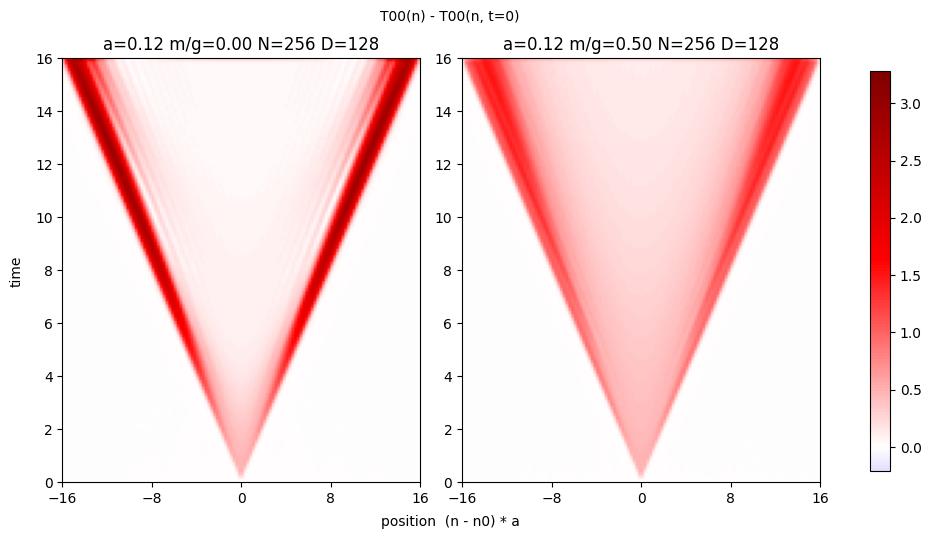

In [19]:
plot_heatmaps("T00", 'T00(n) - T00(n, t=0)', data, NaDdt, ms, g, None, subtract_t0=True, avarage_nn=True)  # None -> fT00,  for analytical m=0

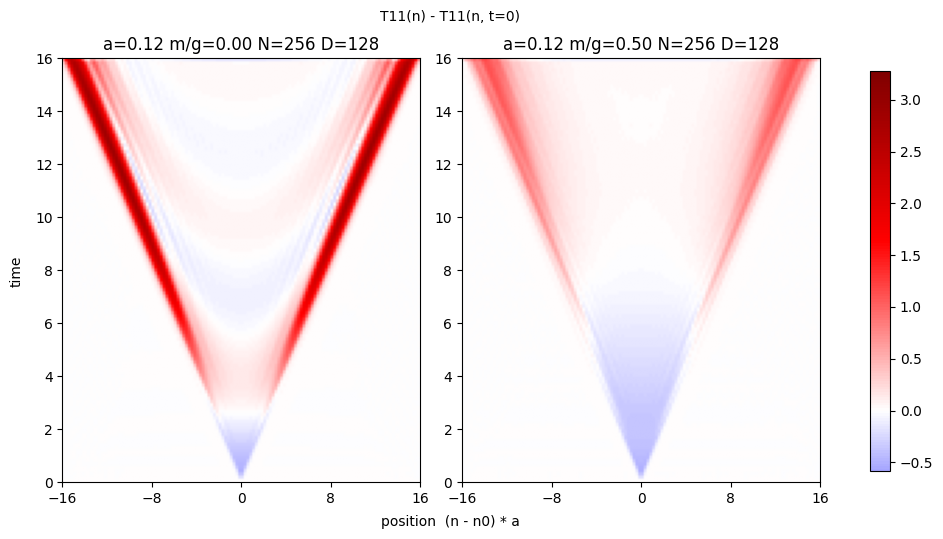

In [20]:
plot_heatmaps("T11", 'T11(n) - T11(n, t=0)', data, NaDdt, ms, g, None, subtract_t0=True, avarage_nn=True)  # None -> fT11,  for analytical m=0

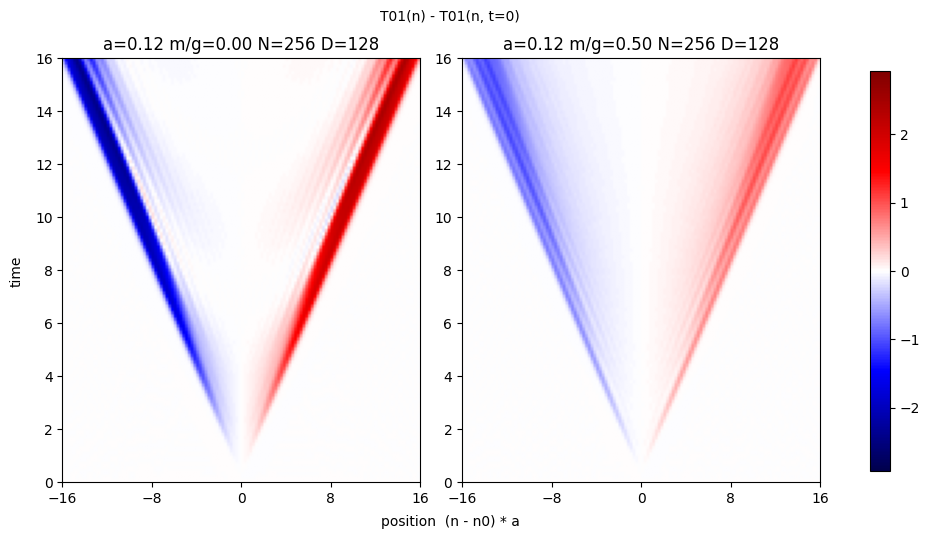

In [21]:
plot_heatmaps("T01", 'T01(n) - T01(n, t=0)', data, NaDdt, ms, g, None, subtract_t0=True, avarage_nn=True)  # fT01,

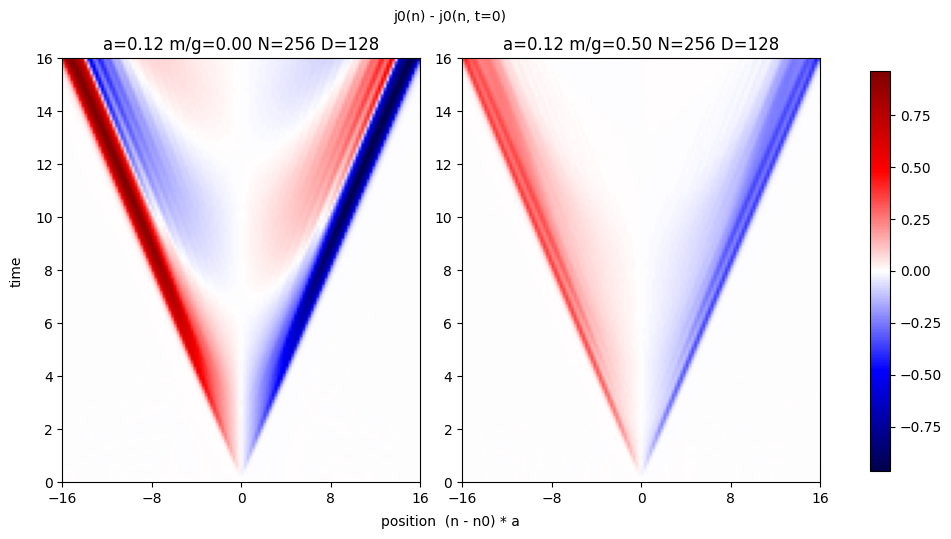

In [22]:
plot_heatmaps("j0", 'j0(n) - j0(n, t=0)', data, NaDdt, ms, g, None, subtract_t0=True, avarage_nn=False)  # fj0,

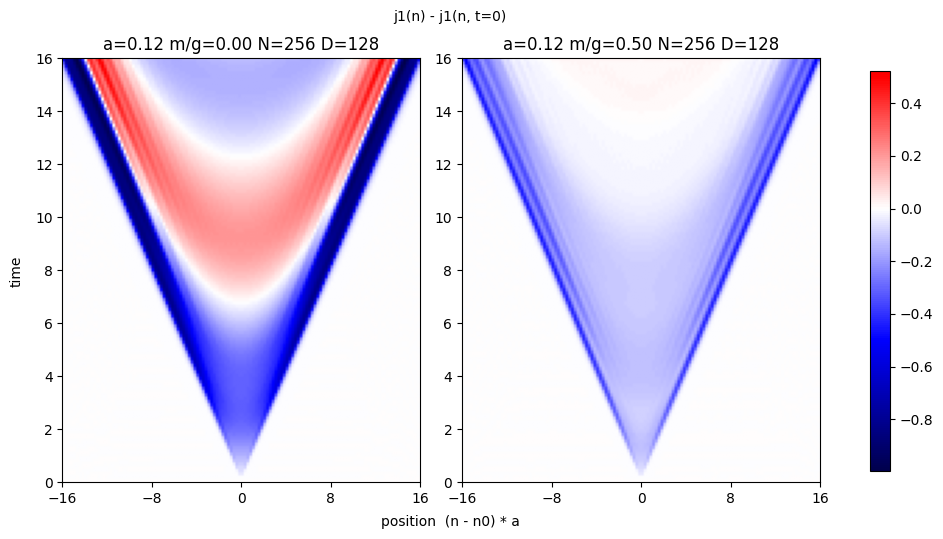

In [23]:
plot_heatmaps("j1", 'j1(n) - j1(n, t=0)', data, NaDdt, ms, g, None, subtract_t0=True, avarage_nn=False)  # fj1,

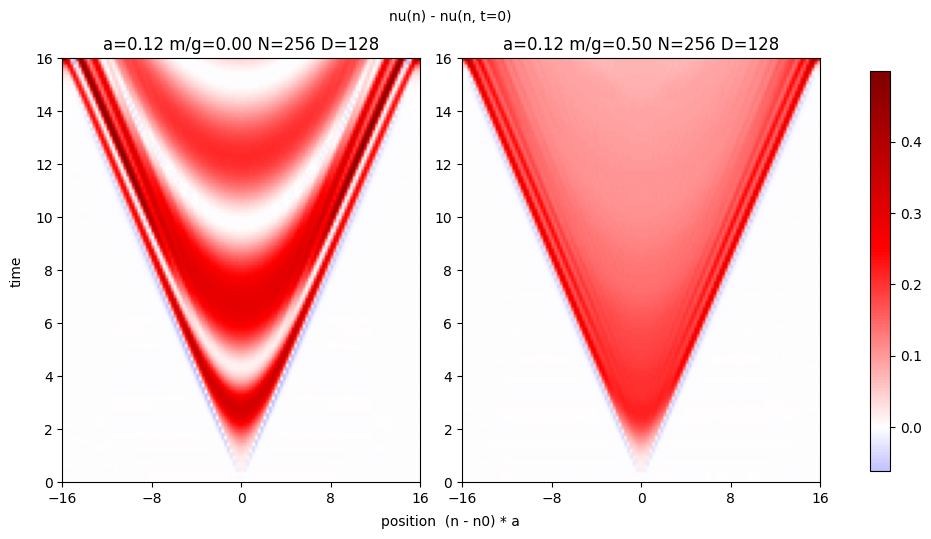

In [24]:
plot_heatmaps("nu", 'nu(n) - nu(n, t=0)', data, NaDdt, ms, g, None, subtract_t0=True, avarage_nn=False)  #  fnu,

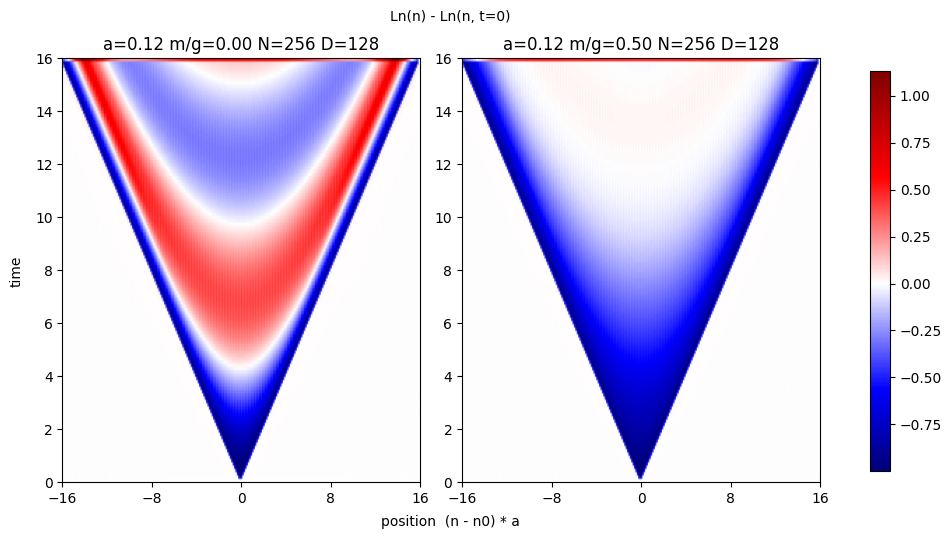

In [25]:
plot_heatmaps("Ln", 'Ln(n) - Ln(n, t=0)', data, NaDdt, ms, g, None, subtract_t0=True, avarage_nn=False)  # fLn,